# Jisu's DIY COVID-19 DASHBOARD Project

## What is this project about 
This project was done as a part of coursework for ECS780P - Computer Programming. <br>
The assignment required me to develop a simple dashboard that downloads and displays the data about infectious diseases from the UK Health Security Agency (UKHSA) dashboard. 

<br>

### Learning Objectives
- Accessing web-based Application Programming Interfaces (APIs)
- JSON data interchange file format
- Basic usage of the Pandas data analysis library and its plotting capabilities (supplied by Matplotlib)
- Building a basic Graphical User Interface (GUI) using iPython Widgets
- Voila dashboarding tool for Python
- The basics of GitHub repositories and Binders
- Managing a small software project of practical applicability

<br>

### Requirements
- Implement a simple dashboard that can:
    - read pandemic statistics stored in a JSON file 
    - upon user request, download current data on a chosen disease from the UKHSA website via its API
    - display such data in the form of one or more graphs
    - allow the user to interact with said graphs via interactive widgets
    - set up a GitHub repository for the software
    - make the dashboard available online as a Binder

<br>

### Chosen Disease Data
- Influenza
- Rhinovirus (Common Cold)
- COVID-19

<br>

### Motivation of Choosing These Three Diseases
As the weather gets colder, it is common for people to feel unwell. Whether it is a cough, sore throat, or fatigue, it is easy to wonder if one has caught a cold (Rhinovirus) or flu (Influenza) or COVID-19. This is because all three share similar symptoms. This overlap can make it difficult for one to determine which illness one might have. For this reason, I decided to compare and contrast these three diseases using data from the UKHSA.

<br>

### What I am doing specifically using such data
To be specific, I am using these APIs for this project:
- Influenza percentage of positive PCR tests in a 7 day period
- Rhinovirus(Common cold) percentage of positive PCR tests in a 7 day period
- Covid-19 percentage of positive PCR tests in a 7 day rolling period

<br>

The first two APIs provide the weekly average percentage of positive PCR tests for Influenza and Rhinovirus, while the third API offers the daily percentage of positive PCR tests for COVID-19. To ensure consistency in the comparison, adjusting the data from the third API to align with the weekly average format used by the first two is required. Eventually, the weekly average percentage of positive PCR tests for Influenza, Rhinovirus, and COVID-19 will be compared. 

<br>

The UKHSA has been experiencing technical issues in updating the percentage of positive PCR tests for COVID-19, which has resulted in "NaN" (Not a Number) values in the data. I have chosen not to fill these missing values with zeros, as doing so could misrepresent the actual situation and lead to inaccurate conclusions. While I am transforming the daily data to a weekly format to compare it with the Influenza and Rhinovirus data, this transformation does not alter the underlying data itself — it is only the aggregation method. By leaving the NaN values unchanged, I have tried to maintain the integrity of the analysis and ensure that any gaps in reporting are accurately reflected.

<br>

It is important to note that, as I am using live APIs, the data is continually updated. Once the UKHSA resolves the technical issues and updates the data, the missing values (NaNs) will be replaced with the most current information. Therefore, the NaN values are temporary, and the analysis will reflect the updated data when it becomes available.

<br>

### Table of content
1. Accessing UKHSA Data
2. Visualising the Data
3. Adding Interactive Controls

<br>

***

## Accessing UKHSA Data

### The UKHSA web-based API

Source: https://ukhsa-dashboard.data.gov.uk/

- The URL path should be appened after API access point: https://api.ukhsa-dashboard.data.gov.uk/
- URL path format: /themes/{theme}/sub_themes/{sub_theme}/topics/{topic}/geography_types/{geography_type}/geographies/{geography}/metrics/{metric}

### API addresses that I am using for this project:

Influenza percentage of positive PCR tests in a 7 day period <br>
https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_testing_positivityByWeek

Rhinovirus(Common cold) percentage of positive PCR tests in a 7 day period <br>
https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Rhinovirus/geography_types/Nation/geographies/England/metrics/rhinovirus_testing_positivityByWeek

Covid-19 percentage of positive PCR tests in a 7 day rolling period <br>
https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/COVID-19/geography_types/Nation/geographies/England/metrics/COVID-19_testing_positivity7DayRolling

In [1]:
# Save data to the files
# Influenza
!wget https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_testing_positivityByWeek

# Rhinovirus (Common Cold)
!wget https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Rhinovirus/geography_types/Nation/geographies/England/metrics/rhinovirus_testing_positivityByWeek

# Covid-19
!wget https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/COVID-19/geography_types/Nation/geographies/England/metrics/COVID-19_testing_positivity7DayRolling

--2024-11-29 02:18:20--  https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_testing_positivityByWeek
Resolving api.ukhsa-dashboard.data.gov.uk (api.ukhsa-dashboard.data.gov.uk)... 108.138.217.88, 108.138.217.92, 108.138.217.42, ...
Connecting to api.ukhsa-dashboard.data.gov.uk (api.ukhsa-dashboard.data.gov.uk)|108.138.217.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2147 (2.1K) [application/json]
Saving to: ‘influenza_testing_positivityByWeek’

influenza_testing_p 100%[===================>]   2.10K  --.-KB/s    in 0s      

2024-11-29 02:18:21 (512 MB/s) - ‘influenza_testing_positivityByWeek’ saved [2147/2147]

--2024-11-29 02:18:21--  https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Rhinovirus/geography_types/Nation/geographies/England/metrics/rhinovirus_testing_positivityByWeek
Resolving api.

In [2]:
# To view the file content
# Influenza
!cat influenza_testing_positivityByWeek


{"count":3254,"next":"https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_testing_positivityByWeek?page=2","previous":null,"results":[{"theme":"infectious_disease","sub_theme":"respiratory","topic":"Influenza","geography_type":"Nation","geography":"England","geography_code":"E92000001","metric":"influenza_testing_positivityByWeek","metric_group":"testing","stratum":"default","sex":"all","age":"45-64","year":2017,"month":7,"epiweek":27,"date":"2017-07-03","metric_value":1.81,"in_reporting_delay_period":false},{"theme":"infectious_disease","sub_theme":"respiratory","topic":"Influenza","geography_type":"Nation","geography":"England","geography_code":"E92000001","metric":"influenza_testing_positivityByWeek","metric_group":"testing","stratum":"default","sex":"all","age":"80+","year":2017,"month":7,"epiweek":27,"date":"2017-07-03","metric_value":3.17,"in_reporting_delay_period":

In [3]:
# To view the file content
# Rhinovirus (Commond Cold)
!cat rhinovirus_testing_positivityByWeek

{"count":2702,"next":"https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Rhinovirus/geography_types/Nation/geographies/England/metrics/rhinovirus_testing_positivityByWeek?page=2","previous":null,"results":[{"theme":"infectious_disease","sub_theme":"respiratory","topic":"Rhinovirus","geography_type":"Nation","geography":"England","geography_code":"E92000001","metric":"rhinovirus_testing_positivityByWeek","metric_group":"testing","stratum":"default","sex":"all","age":"80+","year":2017,"month":7,"epiweek":27,"date":"2017-07-03","metric_value":18.18,"in_reporting_delay_period":false},{"theme":"infectious_disease","sub_theme":"respiratory","topic":"Rhinovirus","geography_type":"Nation","geography":"England","geography_code":"E92000001","metric":"rhinovirus_testing_positivityByWeek","metric_group":"testing","stratum":"default","sex":"all","age":"15-44","year":2017,"month":7,"epiweek":27,"date":"2017-07-03","metric_value":14.29,"in_reporting_delay_

In [4]:
# To view the file content
# Covid-19
! cat COVID-19_testing_positivity7DayRolling

{"count":1730,"next":"https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/COVID-19/geography_types/Nation/geographies/England/metrics/COVID-19_testing_positivity7DayRolling?page=2","previous":null,"results":[{"theme":"infectious_disease","sub_theme":"respiratory","topic":"COVID-19","geography_type":"Nation","geography":"England","geography_code":"E92000001","metric":"COVID-19_testing_positivity7DayRolling","metric_group":"testing","stratum":"default","sex":"all","age":"all","year":2020,"month":2,"epiweek":6,"date":"2020-02-08","metric_value":0.93,"in_reporting_delay_period":false},{"theme":"infectious_disease","sub_theme":"respiratory","topic":"COVID-19","geography_type":"Nation","geography":"England","geography_code":"E92000001","metric":"COVID-19_testing_positivity7DayRolling","metric_group":"testing","stratum":"default","sex":"all","age":"all","year":2020,"month":2,"epiweek":6,"date":"2020-02-09","metric_value":0.88,"in_reporting_delay_per

### Using the "requests" library

- Access the API using the requests library <br>
- .json() method parses a JSON response from an API or web service into a Python dictionary

Request data on the percentage of positive PCR tests for Influenza over a 7-day period in 2024

In [5]:
import requests

# Influenza for 2024
requests.get("https://api.ukhsa-dashboard.data.gov.uk/themes"
             "/infectious_disease/sub_themes/respiratory/topics"
             "/Influenza/geography_types/Nation/geographies/England/"
             "metrics/influenza_testing_positivityByWeek", 
             params={'year': 2024, 'age': 'all'}).json()

{'count': 47,
 'next': 'https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Influenza/geography_types/Nation/geographies/England/metrics/influenza_testing_positivityByWeek?age=all&page=2&year=2024',
 'previous': None,
 'results': [{'theme': 'infectious_disease',
   'sub_theme': 'respiratory',
   'topic': 'Influenza',
   'geography_type': 'Nation',
   'geography': 'England',
   'geography_code': 'E92000001',
   'metric': 'influenza_testing_positivityByWeek',
   'metric_group': 'testing',
   'stratum': 'default',
   'sex': 'all',
   'age': 'all',
   'year': 2024,
   'month': 1,
   'epiweek': 1,
   'date': '2024-01-01',
   'metric_value': 9.7,
   'in_reporting_delay_period': False},
  {'theme': 'infectious_disease',
   'sub_theme': 'respiratory',
   'topic': 'Influenza',
   'geography_type': 'Nation',
   'geography': 'England',
   'geography_code': 'E92000001',
   'metric': 'influenza_testing_positivityByWeek',
   'metric_group': 'testing',
   '

Request data on the percentage of positive PCR tests for Rhinovirus over a 7-day period in 2024

In [6]:
# Rhinovirus for 2024
requests.get("https://api.ukhsa-dashboard.data.gov.uk/themes/"
             "infectious_disease/sub_themes/respiratory/topics"
             "/Rhinovirus/geography_types/Nation/geographies/England/"
             "metrics/rhinovirus_testing_positivityByWeek",
             params={'year': 2024, 'age': 'all'}).json()


{'count': 47,
 'next': 'https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/Rhinovirus/geography_types/Nation/geographies/England/metrics/rhinovirus_testing_positivityByWeek?age=all&page=2&year=2024',
 'previous': None,
 'results': [{'theme': 'infectious_disease',
   'sub_theme': 'respiratory',
   'topic': 'Rhinovirus',
   'geography_type': 'Nation',
   'geography': 'England',
   'geography_code': 'E92000001',
   'metric': 'rhinovirus_testing_positivityByWeek',
   'metric_group': 'testing',
   'stratum': 'default',
   'sex': 'all',
   'age': 'all',
   'year': 2024,
   'month': 1,
   'epiweek': 1,
   'date': '2024-01-01',
   'metric_value': 9.81,
   'in_reporting_delay_period': False},
  {'theme': 'infectious_disease',
   'sub_theme': 'respiratory',
   'topic': 'Rhinovirus',
   'geography_type': 'Nation',
   'geography': 'England',
   'geography_code': 'E92000001',
   'metric': 'rhinovirus_testing_positivityByWeek',
   'metric_group': 'testing

Request data on the percentage of positive PCR tests for Covid-19 over a 7-day rolling period in 2024

In [7]:
# Covid-19 for 2024
requests.get("https://api.ukhsa-dashboard.data.gov.uk/themes/"
             "infectious_disease/sub_themes/respiratory/topics"
             "/COVID-19/geography_types/Nation/geographies/England/"
             "metrics/COVID-19_testing_positivity7DayRolling",
             params={'year': 2024, 'age': 'all'}).json()


{'count': 307,
 'next': 'https://api.ukhsa-dashboard.data.gov.uk/themes/infectious_disease/sub_themes/respiratory/topics/COVID-19/geography_types/Nation/geographies/England/metrics/COVID-19_testing_positivity7DayRolling?age=all&page=2&year=2024',
 'previous': None,
 'results': [{'theme': 'infectious_disease',
   'sub_theme': 'respiratory',
   'topic': 'COVID-19',
   'geography_type': 'Nation',
   'geography': 'England',
   'geography_code': 'E92000001',
   'metric': 'COVID-19_testing_positivity7DayRolling',
   'metric_group': 'testing',
   'stratum': 'default',
   'sex': 'all',
   'age': 'all',
   'year': 2024,
   'month': 1,
   'epiweek': 1,
   'date': '2024-01-01',
   'metric_value': 13.09,
   'in_reporting_delay_period': False},
  {'theme': 'infectious_disease',
   'sub_theme': 'respiratory',
   'topic': 'COVID-19',
   'geography_type': 'Nation',
   'geography': 'England',
   'geography_code': 'E92000001',
   'metric': 'COVID-19_testing_positivity7DayRolling',
   'metric_group': 'te

### A simple API wrapper object

In [8]:
import requests
import time

class APIwrapper:
    # For all instances to share class variables
    _access_point = "https://api.ukhsa-dashboard.data.gov.uk"
    _last_access = 0.0 # last API access time
    
    def __init__(self, theme, sub_theme, topic, geography_type, geography, metric):
        """ Initialise the APIwrapper object and construct the API endpoint using the structure parameters. """
        
        # URL path with all of the required structure parameters
        # The actual values will replace parameters when an object of the class is instantiated
        url_path = (f"/themes/{theme}/sub_themes/{sub_theme}/topics/{topic}/geography_types/" +
                    f"{geography_type}/geographies/{geography}/metrics/{metric}")
        
        # Starting API endpoint
        self._start_url = APIwrapper._access_point+url_path
        self._filters = None
        self._page_size = -1
        
        # Contain the number of items
        self.count = None

    def get_page(self, filters={}, page_size=5):
        """ Access the API and download the next page of data."""
        
        # Check page size is within range, if not then display a value error
        if page_size > 52:
            raise ValueError("Max supported page size is 52")
        
        # If page or filters have changed, restart from the first page
        if filters != self._filters or page_size != self._page_size:
            self._filters = filters
            self._page_size = page_size
            self._next_url = self._start_url
        
        # A condition for when one reaches the end of data
        if self._next_url == None: 
            return [] # The last page has been already fetched
        
        # Set a limit on simple rate to avoid bans from UKHSA
        curr_time = time.time() # Unix time: the total number of seconds that have elapsed since the Epoch.
        deltat = curr_time - APIwrapper._last_access
        if deltat < 0.33: # Set maximum requests per second to 3
            time.sleep(0.33 - deltat) # Add delay by (0.33 - deltat)
        APIwrapper._last_access = curr_time
        
        # Remove all the None values in filters and add page_size to build a parameter dictionary
        parameters = {x: y for x, y in filters.items() if y != None}
        parameters['page_size'] = page_size

        # _next_url already has the page parameter
        # API access. json method makes response a Python dictionary 
        response = requests.get(self._next_url, params=parameters).json()

        # Update URL to fetch the next page
        self._next_url=response['next']
        self.count=response['count']
        # Data is located in the nested results list
        return response['results'] 

    def get_all_pages(self, filters={}, page_size=52):
        """ Access the API and download all available data pages of data."""
        data=[] # All data is being stored here
        while True:
            # Job (including pacing) will be done by get_page
            next_page=self.get_page(filters, page_size)
            if next_page==[]:
                break # Done
            data.extend(next_page)
        return data

#### Define a `structure` dictionary containing main parameters

In [9]:
# Influenza
structure={"theme": "infectious_disease", 
           "sub_theme": "respiratory",
           "topic": "Influenza",
           "geography_type": "Nation", 
           "geography": "England"}

In [10]:
# Rhinovirus
structure2={"theme": "infectious_disease", 
           "sub_theme": "respiratory",
           "topic": "Rhinovirus",
           "geography_type": "Nation", 
           "geography": "England"}

In [11]:
# Covid-19
structure3={"theme": "infectious_disease", 
           "sub_theme": "respiratory",
           "topic": "COVID-19",
           "geography_type": "Nation", 
           "geography": "England"}

Add the specific metric

In [12]:
# the percentage of positive PCR tests for Influenza over a 7-day period in 2024
structure["metric"] = "influenza_testing_positivityByWeek"

In [13]:
# the percentage of positive PCR tests for Rhinovirus over a 7-day period in 2024
structure2["metric"] = "rhinovirus_testing_positivityByWeek"

In [14]:
# the percentage of positive PCR tests for COVID-19 over a 7-days rolling period in 2024
structure3["metric"] = "COVID-19_testing_positivity7DayRolling"

#### Create the `APIwrapper` object, call `get_page()` and retrieve the first page of data

In [15]:
# Influenza
iapi = APIwrapper(**structure)
idata = iapi.get_page()
print(iapi.count)
print(idata)

3254
[{'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'influenza_testing_positivityByWeek', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': '45-64', 'year': 2017, 'month': 7, 'epiweek': 27, 'date': '2017-07-03', 'metric_value': 1.81, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'influenza_testing_positivityByWeek', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': '80+', 'year': 2017, 'month': 7, 'epiweek': 27, 'date': '2017-07-03', 'metric_value': 3.17, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'me

In [16]:
# Rhinovirus
rapi = APIwrapper(**structure2)
rdata = rapi.get_page()
print(rapi.count)
print(rdata)

2702
[{'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Rhinovirus', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'rhinovirus_testing_positivityByWeek', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': '80+', 'year': 2017, 'month': 7, 'epiweek': 27, 'date': '2017-07-03', 'metric_value': 18.18, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Rhinovirus', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'rhinovirus_testing_positivityByWeek', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': '15-44', 'year': 2017, 'month': 7, 'epiweek': 27, 'date': '2017-07-03', 'metric_value': 14.29, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Rhinovirus', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E9200000

In [17]:
# Covid-19
capi = APIwrapper(**structure3)
cdata = capi.get_page()
print(capi.count)
print(cdata)

1730
[{'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'COVID-19', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'COVID-19_testing_positivity7DayRolling', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2020, 'month': 2, 'epiweek': 6, 'date': '2020-02-08', 'metric_value': 0.93, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'COVID-19', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'COVID-19_testing_positivity7DayRolling', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2020, 'month': 2, 'epiweek': 6, 'date': '2020-02-09', 'metric_value': 0.88, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'COVID-19', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'm

#### Define a dictionary of query parameters to filter the results

In [18]:
# Filter the data for the year 2024

filters = {"stratum": None, # Smallest subgroup a metric can be broken down into
           "age": 'all', # Smallest subgroup for age
           "sex": None, # Patients' gender
           "year": 2024, # Metrics value's year (for yearly metrics)
           "month": None, # Metrics value's month (for monthly metrics)
           "epiweek": None, # Metrics value's week (for weekly metrics)
           "date": None, # Metrics value's record date in YYYY-MM-DD format
           "in_reporting_delay_period": None # Boolean value indicating whether the data point is subject to retrospective updates  
           }

#### Pass this to `get_page`

In [19]:
# Influenza
idata_2024 = iapi.get_page(filters, page_size = 3)
print(iapi.count)
print(idata_2024)

47
[{'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'influenza_testing_positivityByWeek', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2024, 'month': 1, 'epiweek': 1, 'date': '2024-01-01', 'metric_value': 9.7, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'influenza_testing_positivityByWeek', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2024, 'month': 1, 'epiweek': 2, 'date': '2024-01-08', 'metric_value': 9.98, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Influenza', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 

In [20]:
# Rhinovirus
rdata_2024 = rapi.get_page(filters, page_size = 3)
print(rapi.count)
print(rdata_2024)

47
[{'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Rhinovirus', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'rhinovirus_testing_positivityByWeek', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2024, 'month': 1, 'epiweek': 1, 'date': '2024-01-01', 'metric_value': 9.81, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Rhinovirus', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'rhinovirus_testing_positivityByWeek', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2024, 'month': 1, 'epiweek': 2, 'date': '2024-01-08', 'metric_value': 6.78, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'Rhinovirus', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'met

In [21]:
# Covid-19
cdata_2024 = capi.get_page(filters, page_size = 3)
print(capi.count)
print(cdata_2024)

307
[{'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'COVID-19', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'COVID-19_testing_positivity7DayRolling', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2024, 'month': 1, 'epiweek': 1, 'date': '2024-01-01', 'metric_value': 13.09, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'COVID-19', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', 'metric': 'COVID-19_testing_positivity7DayRolling', 'metric_group': 'testing', 'stratum': 'default', 'sex': 'all', 'age': 'all', 'year': 2024, 'month': 1, 'epiweek': 1, 'date': '2024-01-02', 'metric_value': 13.11, 'in_reporting_delay_period': False}, {'theme': 'infectious_disease', 'sub_theme': 'respiratory', 'topic': 'COVID-19', 'geography_type': 'Nation', 'geography': 'England', 'geography_code': 'E92000001', '

### Downloading all data for the percentage of positive PCR tests in a 7 day period for Influenza and Rhinovirus (2024) & the percentage of positive PCR tests in a 7 day rolling period for Covid-19 (2024)

In [22]:
influenza = iapi.get_all_pages(filters)
rhinovirus = rapi.get_all_pages(filters)
covid19 = capi.get_all_pages(filters)

### Saving the data in JSON format

Saving the result of API queries to have data for other notebooks and dashboard

In [23]:
import json

In [24]:
# Save data for Influenza
with open("influenza.json", "wt") as OUTF:
    json.dump(influenza, OUTF)

In [25]:
# Save data for Rhinovirus
with open("rhinovirus.json", "wt") as OUTF:
    json.dump(rhinovirus, OUTF)

In [26]:
# Save data for Covid-19
with open("covid19.json", "wt") as OUTF:
    json.dump(covid19, OUTF)

***

## Visualising the Data

Import `pandas` and `matplotlib` libaries for data processing and data visualisation

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [28]:
# Enable the embedded matplotlib output using iPython
%matplotlib inline

# Enlarge figures
plt.rcParams['figure.dpi'] = 200

### Time Series data

Load the data from saved JSON file

In [29]:
# Influenza
with open("influenza.json", "rt") as INFILE:
    influenza = json.load(INFILE)

# Rhinovirus
with open("rhinovirus.json", "rt") as INFILE:
    rhinovirus = json.load(INFILE)

# Covid-19
with open("covid19.json", "rt") as INFILE:
    covid19 = json.load(INFILE)

### Wrangling the data

Need to format data to extract values for the x axis (date) for the plot, which will become the index of a DataFrame containing the data in columns

In [30]:
influenza[:5]

[{'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'Influenza',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'influenza_testing_positivityByWeek',
  'metric_group': 'testing',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2024,
  'month': 1,
  'epiweek': 1,
  'date': '2024-01-01',
  'metric_value': 9.7,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'Influenza',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'influenza_testing_positivityByWeek',
  'metric_group': 'testing',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2024,
  'month': 1,
  'epiweek': 2,
  'date': '2024-01-08',
  'metric_value': 9.98,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'Influenza',
  'geography_type': 'Natio

In [31]:
rhinovirus[:5]

[{'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'Rhinovirus',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'rhinovirus_testing_positivityByWeek',
  'metric_group': 'testing',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2024,
  'month': 1,
  'epiweek': 1,
  'date': '2024-01-01',
  'metric_value': 9.81,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'Rhinovirus',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'rhinovirus_testing_positivityByWeek',
  'metric_group': 'testing',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2024,
  'month': 1,
  'epiweek': 2,
  'date': '2024-01-08',
  'metric_value': 6.78,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'Rhinovirus',
  'geography_type': 

In [32]:
covid19[:5]

[{'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'COVID-19',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'COVID-19_testing_positivity7DayRolling',
  'metric_group': 'testing',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2024,
  'month': 1,
  'epiweek': 1,
  'date': '2024-01-01',
  'metric_value': 13.09,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'COVID-19',
  'geography_type': 'Nation',
  'geography': 'England',
  'geography_code': 'E92000001',
  'metric': 'COVID-19_testing_positivity7DayRolling',
  'metric_group': 'testing',
  'stratum': 'default',
  'sex': 'all',
  'age': 'all',
  'year': 2024,
  'month': 1,
  'epiweek': 1,
  'date': '2024-01-02',
  'metric_value': 13.11,
  'in_reporting_delay_period': False},
 {'theme': 'infectious_disease',
  'sub_theme': 'respiratory',
  'topic': 'COVID-19',
  'geography_type'

In [33]:
from datetime import datetime, timedelta

# Extract certain covid-19 json file data and manipulate to match the format with Influenza and Rhinovirus

# Convert existing JSON data to DataFrame for manipulation
df_covid19 = pd.DataFrame(covid19)

# Process the data
weekly_data = (
    df_covid19.groupby(['epiweek', 'metric'])
    .agg({'metric_value': 'mean'}).reset_index()
)

# Round up the mean value to two decimal places
weekly_data['metric_value'] = weekly_data['metric_value'].round(2)

# Date data processing
start_date = datetime(2024, 1, 1)
weekly_data['date'] = weekly_data['epiweek'].apply(
    lambda ew: (start_date + timedelta(weeks = ew - 1)).strftime('%Y-%m-%d')
)

# Convert back to JSON format
updated_data = weekly_data.to_dict(orient='records')

# Overwrite the original file
with open('covid19_2.json', 'w') as f:
    json.dump(updated_data, f, indent=4)


Need `date` and `metric_value` keys for plotting. Thus, will retrieve these values and bring them together into a dictionary, which will have the dates as keys and metrics as values

In [34]:
# Load data for Covid-19 from covid19_2.json
with open("covid19_2.json", "rt") as INFILE:
    covid19 = json.load(INFILE)

In [35]:
data={}
for dataset in [influenza, rhinovirus, covid19]:
    for entry in dataset:
        date=entry['date']
        metric=entry['metric']
        value=entry['metric_value']
        if date not in data:
            data[date]={}
        data[date][metric]=value

In [36]:
data

{'2024-01-01': {'influenza_testing_positivityByWeek': 9.7,
  'rhinovirus_testing_positivityByWeek': 9.81,
  'COVID-19_testing_positivity7DayRolling': 12.83},
 '2024-01-08': {'influenza_testing_positivityByWeek': 9.98,
  'rhinovirus_testing_positivityByWeek': 6.78,
  'COVID-19_testing_positivity7DayRolling': 11.67},
 '2024-01-15': {'influenza_testing_positivityByWeek': 13.76,
  'rhinovirus_testing_positivityByWeek': 7.82,
  'COVID-19_testing_positivity7DayRolling': 10.84},
 '2024-01-22': {'influenza_testing_positivityByWeek': 17.65,
  'rhinovirus_testing_positivityByWeek': 8.44,
  'COVID-19_testing_positivity7DayRolling': 10.73},
 '2024-01-29': {'influenza_testing_positivityByWeek': 15.44,
  'rhinovirus_testing_positivityByWeek': 8.59,
  'COVID-19_testing_positivity7DayRolling': 9.39},
 '2024-02-05': {'influenza_testing_positivityByWeek': 12.88,
  'rhinovirus_testing_positivityByWeek': 8.67,
  'COVID-19_testing_positivity7DayRolling': 8.15},
 '2024-02-12': {'influenza_testing_positivity

#### Sort data by the dates

In [37]:
dates = list(data.keys())
dates.sort()
dates

['2024-01-01',
 '2024-01-08',
 '2024-01-15',
 '2024-01-22',
 '2024-01-29',
 '2024-02-05',
 '2024-02-12',
 '2024-02-19',
 '2024-02-26',
 '2024-03-04',
 '2024-03-11',
 '2024-03-18',
 '2024-03-25',
 '2024-04-01',
 '2024-04-08',
 '2024-04-15',
 '2024-04-22',
 '2024-04-29',
 '2024-05-06',
 '2024-05-13',
 '2024-05-20',
 '2024-05-27',
 '2024-06-03',
 '2024-06-10',
 '2024-06-17',
 '2024-06-24',
 '2024-07-01',
 '2024-07-08',
 '2024-07-15',
 '2024-07-22',
 '2024-07-29',
 '2024-08-05',
 '2024-08-12',
 '2024-08-19',
 '2024-08-26',
 '2024-09-02',
 '2024-09-09',
 '2024-09-16',
 '2024-09-23',
 '2024-09-30',
 '2024-10-07',
 '2024-10-14',
 '2024-10-21',
 '2024-10-28',
 '2024-11-04',
 '2024-11-11',
 '2024-11-18']

Convert dates to the `pandas`type for representing dates

In [38]:
# Convert to pandas datetime
dates_df = pd.to_datetime(dates)

# Format as Week n (YYYY-MM-DD)
formatted_dates = [f"Week {i + 1} \n ({date.strftime('%Y-%m-%d')})" for i, date in enumerate(dates_df)]

formatted_dates



['Week 1 \n (2024-01-01)',
 'Week 2 \n (2024-01-08)',
 'Week 3 \n (2024-01-15)',
 'Week 4 \n (2024-01-22)',
 'Week 5 \n (2024-01-29)',
 'Week 6 \n (2024-02-05)',
 'Week 7 \n (2024-02-12)',
 'Week 8 \n (2024-02-19)',
 'Week 9 \n (2024-02-26)',
 'Week 10 \n (2024-03-04)',
 'Week 11 \n (2024-03-11)',
 'Week 12 \n (2024-03-18)',
 'Week 13 \n (2024-03-25)',
 'Week 14 \n (2024-04-01)',
 'Week 15 \n (2024-04-08)',
 'Week 16 \n (2024-04-15)',
 'Week 17 \n (2024-04-22)',
 'Week 18 \n (2024-04-29)',
 'Week 19 \n (2024-05-06)',
 'Week 20 \n (2024-05-13)',
 'Week 21 \n (2024-05-20)',
 'Week 22 \n (2024-05-27)',
 'Week 23 \n (2024-06-03)',
 'Week 24 \n (2024-06-10)',
 'Week 25 \n (2024-06-17)',
 'Week 26 \n (2024-06-24)',
 'Week 27 \n (2024-07-01)',
 'Week 28 \n (2024-07-08)',
 'Week 29 \n (2024-07-15)',
 'Week 30 \n (2024-07-22)',
 'Week 31 \n (2024-07-29)',
 'Week 32 \n (2024-08-05)',
 'Week 33 \n (2024-08-12)',
 'Week 34 \n (2024-08-19)',
 'Week 35 \n (2024-08-26)',
 'Week 36 \n (2024-09-02)',
 

Define `DataFrame`

In [39]:
timeseriesdf=pd.DataFrame(index=formatted_dates, columns=['influenza', 'rhinovirus', 'covid19'])
timeseriesdf

,influenza,rhinovirus,covid19
Week 1 \n (2024-01-01),NaN,NaN,NaN
Week 2 \n (2024-01-08),NaN,NaN,NaN
Week 3 \n (2024-01-15),NaN,NaN,NaN
Week 4 \n (2024-01-22),NaN,NaN,NaN
Week 5 \n (2024-01-29),NaN,NaN,NaN
Week 6 \n (2024-02-05),NaN,NaN,NaN
Week 7 \n (2024-02-12),NaN,NaN,NaN
Week 8 \n (2024-02-19),NaN,NaN,NaN
Week 9 \n (2024-02-26),NaN,NaN,NaN
Week 10 \n (2024-03-04),NaN,NaN,NaN


Fill in the values

In [40]:
# Map formatted_dates to original dates
date_mapping = dict(zip(formatted_dates, dates))

# Translate the columns to metrics
metrics = {'influenza': 'influenza_testing_positivityByWeek',
            'rhinovirus' : 'rhinovirus_testing_positivityByWeek',
            'covid19': 'COVID-19_testing_positivity7DayRolling'
           }

# Replace NaN values with metrics values
for date, entry in data.items():  # each entry is a dictionary with influenza and rhinovirus
    formatted_date = [k for k, v in date_mapping.items() if v == date][0]
    for column in ['influenza', 'rhinovirus', 'covid19']:
        metric_name = metrics[column]
        # Fill in None value to 0.0
        # value = entry.get(metric_name, 0.0)

        # Not filling NaN value with 0.0 due to log graph later
        value = entry.get(metric_name)
        # Access a specific location in the dataframe
        timeseriesdf.loc[formatted_date, column] = value

# Fill in any remaining "holes" due to missing dates
# timeseriesdf.fillna(0.0, inplace=True)
# Not filling NaN value with 0.0 due to log graph later

# Display the resulting DataFrame
timeseriesdf


,influenza,rhinovirus,covid19
Week 1 \n (2024-01-01),9.7,9.81,12.83
Week 2 \n (2024-01-08),9.98,6.78,11.67
Week 3 \n (2024-01-15),13.76,7.82,10.84
Week 4 \n (2024-01-22),17.65,8.44,10.73
Week 5 \n (2024-01-29),15.44,8.59,9.39
Week 6 \n (2024-02-05),12.88,8.67,8.15
Week 7 \n (2024-02-12),10.94,8.33,6.62
Week 8 \n (2024-02-19),8.29,8.4,5.69
Week 9 \n (2024-02-26),6.39,9.13,4.69
Week 10 \n (2024-03-04),5.82,8.96,4.57


### Plotting

#### Create a basic plot of the data

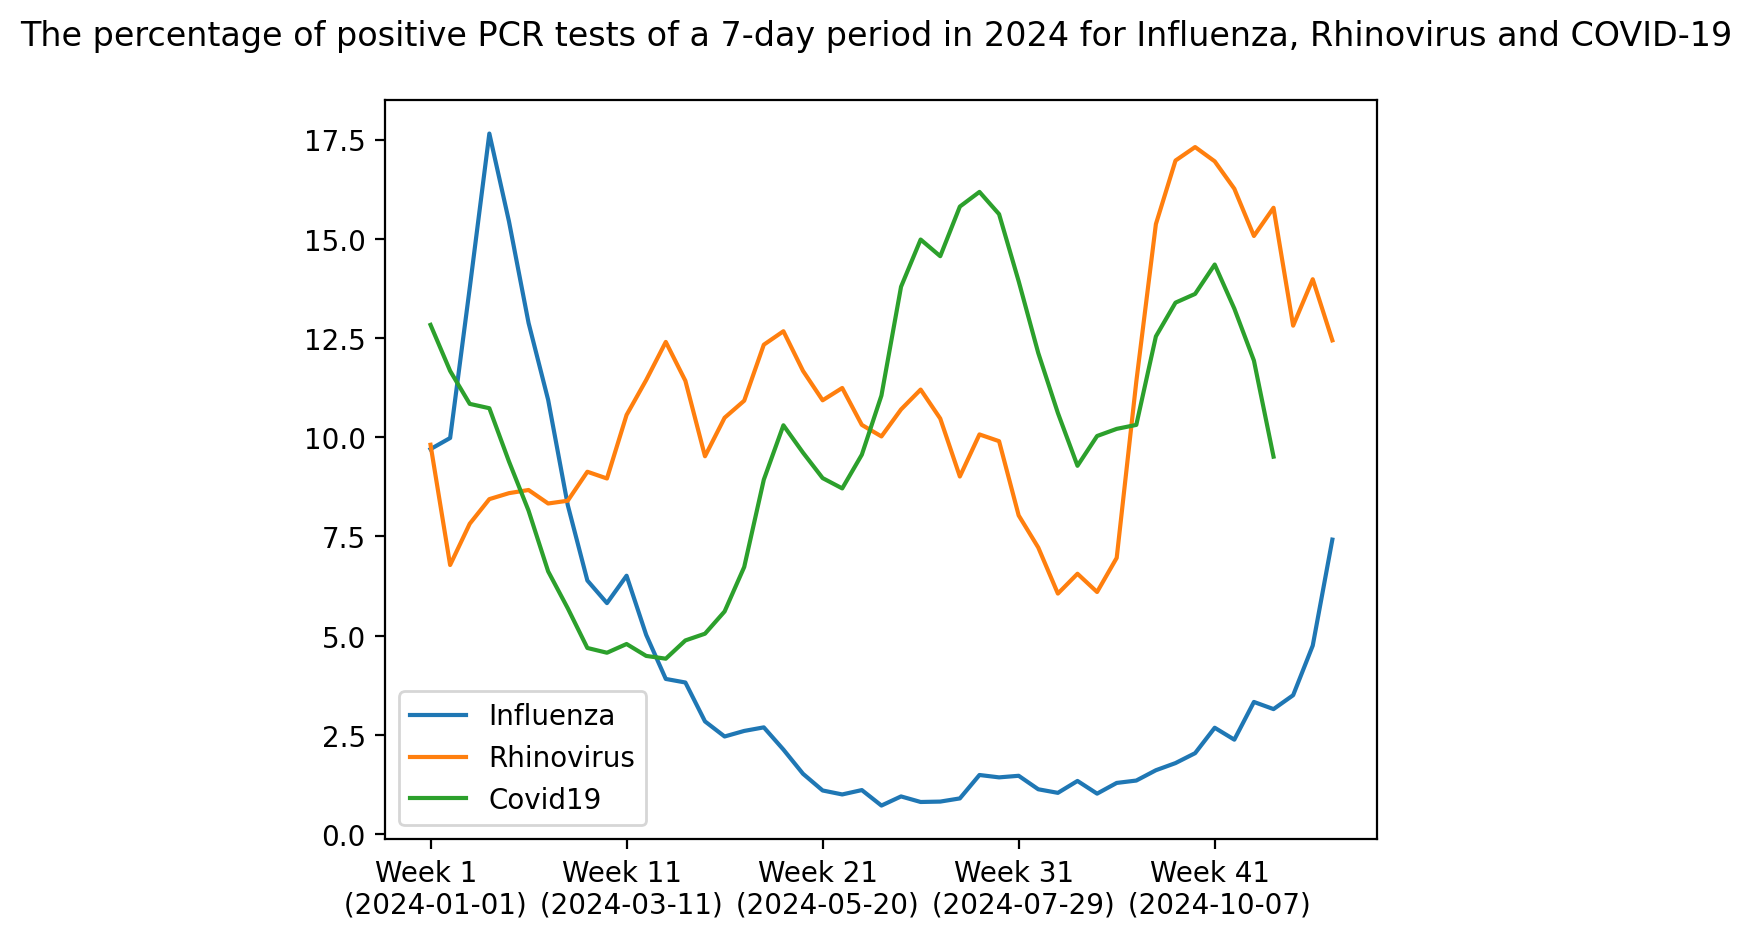

In [41]:
ax = timeseriesdf.plot()
ax.set_title('The percentage of positive PCR tests of a 7-day period in 2024 for Influenza, Rhinovirus and COVID-19 \n')

# Update legend labels to capitalise the first letter of each word
legend_labels = [label.title() for label in ax.get_legend_handles_labels()[1]]
ax.legend(legend_labels)

#### In log scale

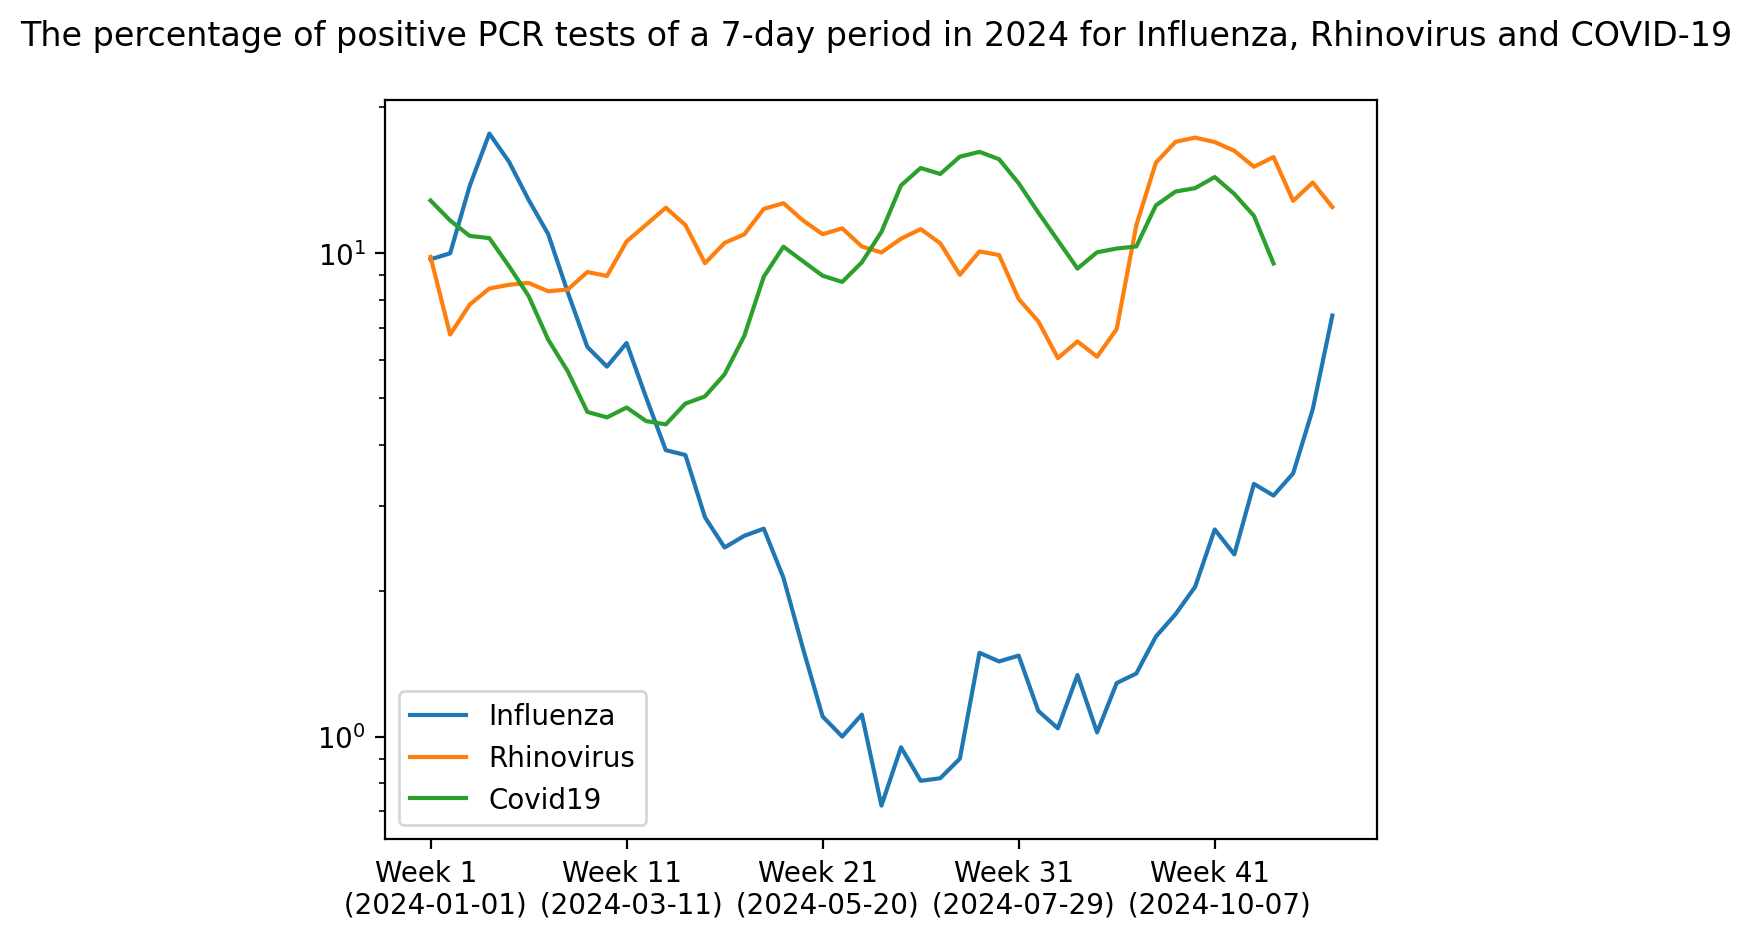

In [42]:
ax=timeseriesdf.plot(logy=True) 
ax.set_title('The percentage of positive PCR tests of a 7-day period in 2024 for Influenza, Rhinovirus and COVID-19 \n')

# Update legend labels to capitalise the first letter of each word
legend_labels = [label.title() for label in ax.get_legend_handles_labels()[1]]
ax.legend(legend_labels)

In [43]:
timeseriesdf.to_pickle("timeseriesdf.pkl")

***

## Adding Interactive Controls

Add interactive controls to graphs using ipywidgets library

In [44]:
from IPython.display import clear_output
import ipywidgets as wdg

### Updating data

Create a button that user can click to pull the most recent API data

In [45]:
# API access function
def api_access(button):
    # Ignore the button parameter
    # Pulling the APIs
    influenza = iapi.get_all_pages(filters)
    rhinovirus = rapi.get_all_pages(filters)
    covid19 = capi.get_all_pages(filters)


    # Switch the icon on the button to 'check' after done with pulling the APIs
    # Disable the button - no need to pull the APIs again
    apibutton.icon = "check"
    apibutton.disabled = True

# Button features
apibutton = wdg.Button(
    description = 'Refresh data', # Text on the button
    disabled = False, # need to be enabled at first
    button_style = '',
    tooltip = 'Click to download current England Public Health data',
    icon = 'download' # Download icon for the button
)

# Call the api_access function with the button
apibutton.on_click(api_access)

# Display the widget using iPython function
display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current En…

### Single-control graphs

Add an interactive control to a graph

In [46]:
# Import the dataframe computed from the json files or current data downloaded from the APIs
timeseriesdf = pd.read_pickle("timeseriesdf.pkl")

In [47]:
# Extract month from formatted_date by manipulating strings
timeseriesdf['month'] = [date.split("(")[-1][5:7] for date in formatted_dates]
print(timeseriesdf)


                        influenza rhinovirus covid19 month
Week 1 \n (2024-01-01)        9.7       9.81   12.83    01
Week 2 \n (2024-01-08)       9.98       6.78   11.67    01
Week 3 \n (2024-01-15)      13.76       7.82   10.84    01
Week 4 \n (2024-01-22)      17.65       8.44   10.73    01
Week 5 \n (2024-01-29)      15.44       8.59    9.39    01
Week 6 \n (2024-02-05)      12.88       8.67    8.15    02
Week 7 \n (2024-02-12)      10.94       8.33    6.62    02
Week 8 \n (2024-02-19)       8.29        8.4    5.69    02
Week 9 \n (2024-02-26)       6.39       9.13    4.69    02
Week 10 \n (2024-03-04)      5.82       8.96    4.57    03
Week 11 \n (2024-03-11)      6.51      10.56    4.79    03
Week 12 \n (2024-03-18)      5.02      11.44    4.49    03
Week 13 \n (2024-03-25)      3.91       12.4    4.42    03
Week 14 \n (2024-04-01)      3.82      11.42    4.88    04
Week 15 \n (2024-04-08)      2.84       9.52    5.05    04
Week 16 \n (2024-04-15)      2.46      10.49    5.61    

In [48]:
# Aggregate Data by Month
monthly_data = timeseriesdf.groupby('month').mean()

print(monthly_data)


      influenza rhinovirus  covid19
month                              
01       13.306      8.288   11.092
02        9.625     8.6325   6.2875
03        5.315      10.84   4.5675
04        2.882     10.936     6.24
05       1.4375    11.6275   9.3975
06       0.8975    10.5575   12.345
07        1.222      9.496    15.22
08       1.1325      6.485    10.51
09        1.616     13.602   12.012
10        2.885     16.015  12.2575
11     5.223333  13.076667      NaN


In [49]:
month = wdg.Select(
    # Options
    options = monthly_data.index.unique(), # Use months for dropdown
    value = monthly_data.index[-1], # Most recent month for initial value
    rows = 1, # Rows of the selection box
    description = 'Month: ',
    disabled = False
)

def monthly_data_graph(graphmonth):
    # Filter data for selected month
    month_data = monthly_data.loc[[graphmonth]]

    # Plotting data for Influenza and Rhinovirus
    ax = month_data.plot(kind='bar', figsize=(10, 6), title=f"The average percentage of positive PCR tests in 2024-{graphmonth} for Influenza, Rhinovirus and COVID-19 \n")
    plt.xticks(rotation=0)

    # Set y-axis limit to 20 to see the percentage change
    ax.set_ylim(0, 20)

    # Update legend labels to capitalise the first letter of each word
    legend_labels = [label.title() for label in ax.get_legend_handles_labels()[1]]
    plt.legend(legend_labels)

    # Update the plot
    plt.show()

# Interactive output
output = wdg.interactive_output(monthly_data_graph, {'graphmonth': month})

# Display the widget and its output
display(month, output)


Select(description='Month: ', index=10, options=('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '…

Output()

### Multiple-control graphs

Add a couple of controls

In [50]:
# Import the dataframe computed from the json files or current data downloaded from the APIs
timeseriesdf = pd.read_pickle("timeseriesdf.pkl")

In [ ]:
# Select Topic
series = wdg.SelectMultiple(
    # Options - Used tuple to use Titlecase for options
    options = [('Influenza', 'influenza'), ('Rhinovirus', 'rhinovirus'), ('Covid19', 'covid19')],
    value = ['influenza', 'rhinovirus', 'covid19'],
    rows = 3,
    description = 'Topic: ',
    disabled = False
)

# Select graph scale
scale = wdg.RadioButtons(
    options = ['Linear', 'Log'],
    description = 'Scale: ',
    disabled = False
)

controls = wdg.HBox([scale, series])

def timeseries_graph(gcols, gscale):
    
    if gscale == 'Linear':
        logscale=False
    else:
        logscale = True
    ncols = len(gcols)
    if ncols > 0:
        ax = timeseriesdf[list(gcols)].plot(logy = logscale)
        # Create a dynamic title based on selected topics
        selected_topics = ", ".join([col.title() for col in gcols])
        ax.set_title(f"\n The percentage of positive PCR tests of a 7-day period in 2024 for {selected_topics} \n")
        ax.legend([col.title() for col in gcols])
        plt.show() # Update the graph
    else:
        print("Click to select topic for graph")
        print("CTRL(or Cmd for Mac) - Click to select more than one topic")

# Output in widget graph
graph = wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

# Display all
display(controls, graph)


Output()